In [1]:
import csv
import pandas as pd
from collections import defaultdict
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
plt.rcParams['figure.dpi'] = 360

## Graph data
<div style="text-align:center; display: flex; justify-content: center;">
  <table>
    <tr>
      <th>Rosette number</th>
      <th>Nodes</th>
      <th>Edges</th>
    </tr>
    <tr>
      <td>3</td>
      <td>11157</td>
      <td>7572</td>
    </tr>
    <tr>
      <td>6</td>
      <td>9568</td>
      <td>5245</td>
    </tr>
    <tr>
      <td>7</td>
      <td>11635</td>
      <td>9257</td>
    </tr>
    <tr>
      <td>11</td>
      <td>13667</td>
      <td>13051</td>
    </tr>
    <tr>
      <td>12</td>
      <td>10617</td>
      <td>6870</td>
    </tr>
    <tr>
      <td>13</td>
      <td>13260</td>
      <td>14395</td>
    </tr>
    <tr>
      <td>14</td>
      <td>10704</td>
      <td>7635</td>
    </tr>
    <tr>
      <td>15</td>
      <td>10131</td>
      <td>8655</td>
    </tr>
    <tr>
      <td>18</td>
      <td>11117</td>
      <td>7991</td>
    </tr>
    <tr>
      <td>19</td>
      <td>10248</td>
      <td>6689</td>
    </tr>
  </table>
</div>



In [2]:
def graph_r(r):

    nodes = []
    edges = []
    edges_distances = []

    with open(f'./data/rosette{r}_nodes.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                n = []
                n.append(float(values[0]))
                n.append(float(values[1]))
                n.extend(22.5-2.5*np.log10([float(n) for n in values[2:-1]]))
                n.append(float(values[-1]))
                nodes.append(n)

    with open(f'./data/rosette{r}_edges.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                edges_distances.append([float(n) for n in list(row.values())])
                edges.append([float(n) for n in list(row.values())][:2])

    return (nodes,edges,edges_distances)

In [3]:
rosettes = [3,6,7,11,12,13,14,15,18,19]

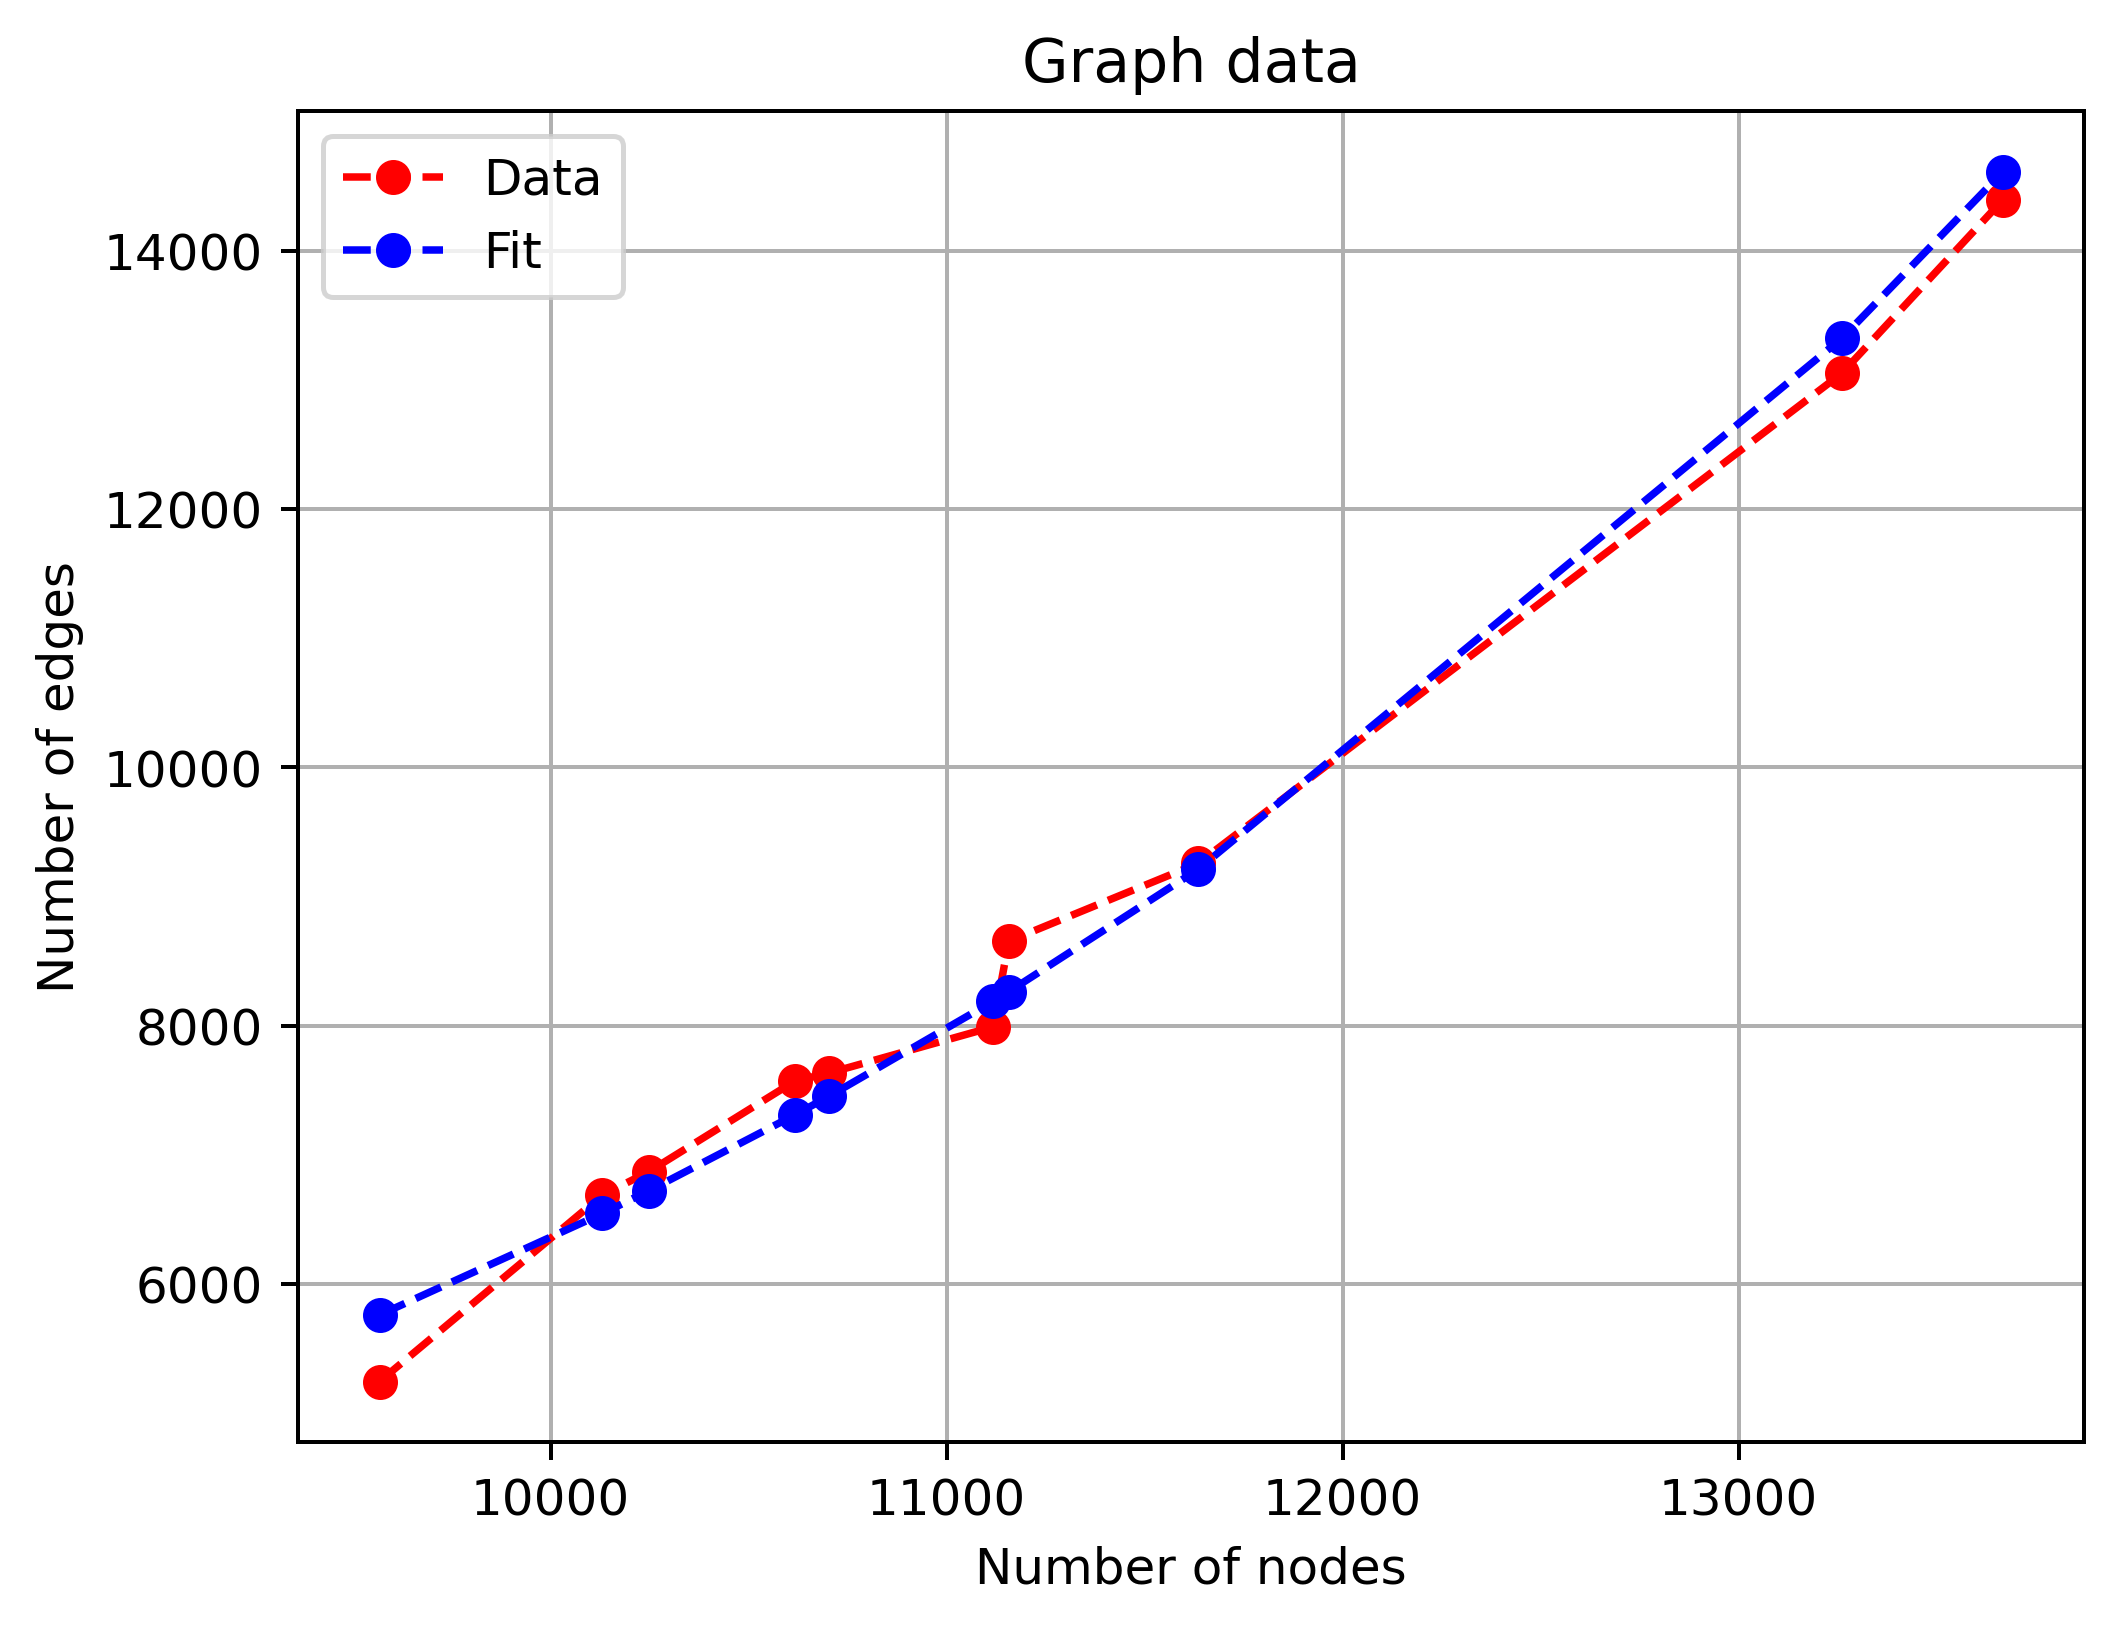

In [4]:
n = [len(nodes) for r in rosettes for nodes, _, _ in [graph_r(r)]]
ed = [len(edges) for r in rosettes for _, edges, _ in [graph_r(r)]]
n.sort()
ed.sort()

log_y = np.log(ed)
model = np.polyfit(n, log_y, 1)
a = np.exp(model[1])
b = model[0]
p = [a*np.exp(b*node) for node in n]

plt.plot(n, ed, marker='o', linestyle='--', color='r')
plt.plot(n, p, marker='o', linestyle='--', color='b')
plt.xlabel('Number of nodes')
plt.ylabel('Number of edges')
plt.title('Graph data')

plt.legend(['Data', 'Fit'])
plt.grid()

/var/folders/ls/yc9nb2gx14s6sstnjr_fcy5r0000gn/T/ipykernel_1004/1578332446.py:19: RuntimeWarning: divide by zero encountered in log10
  log_ed = np.log10(ed)


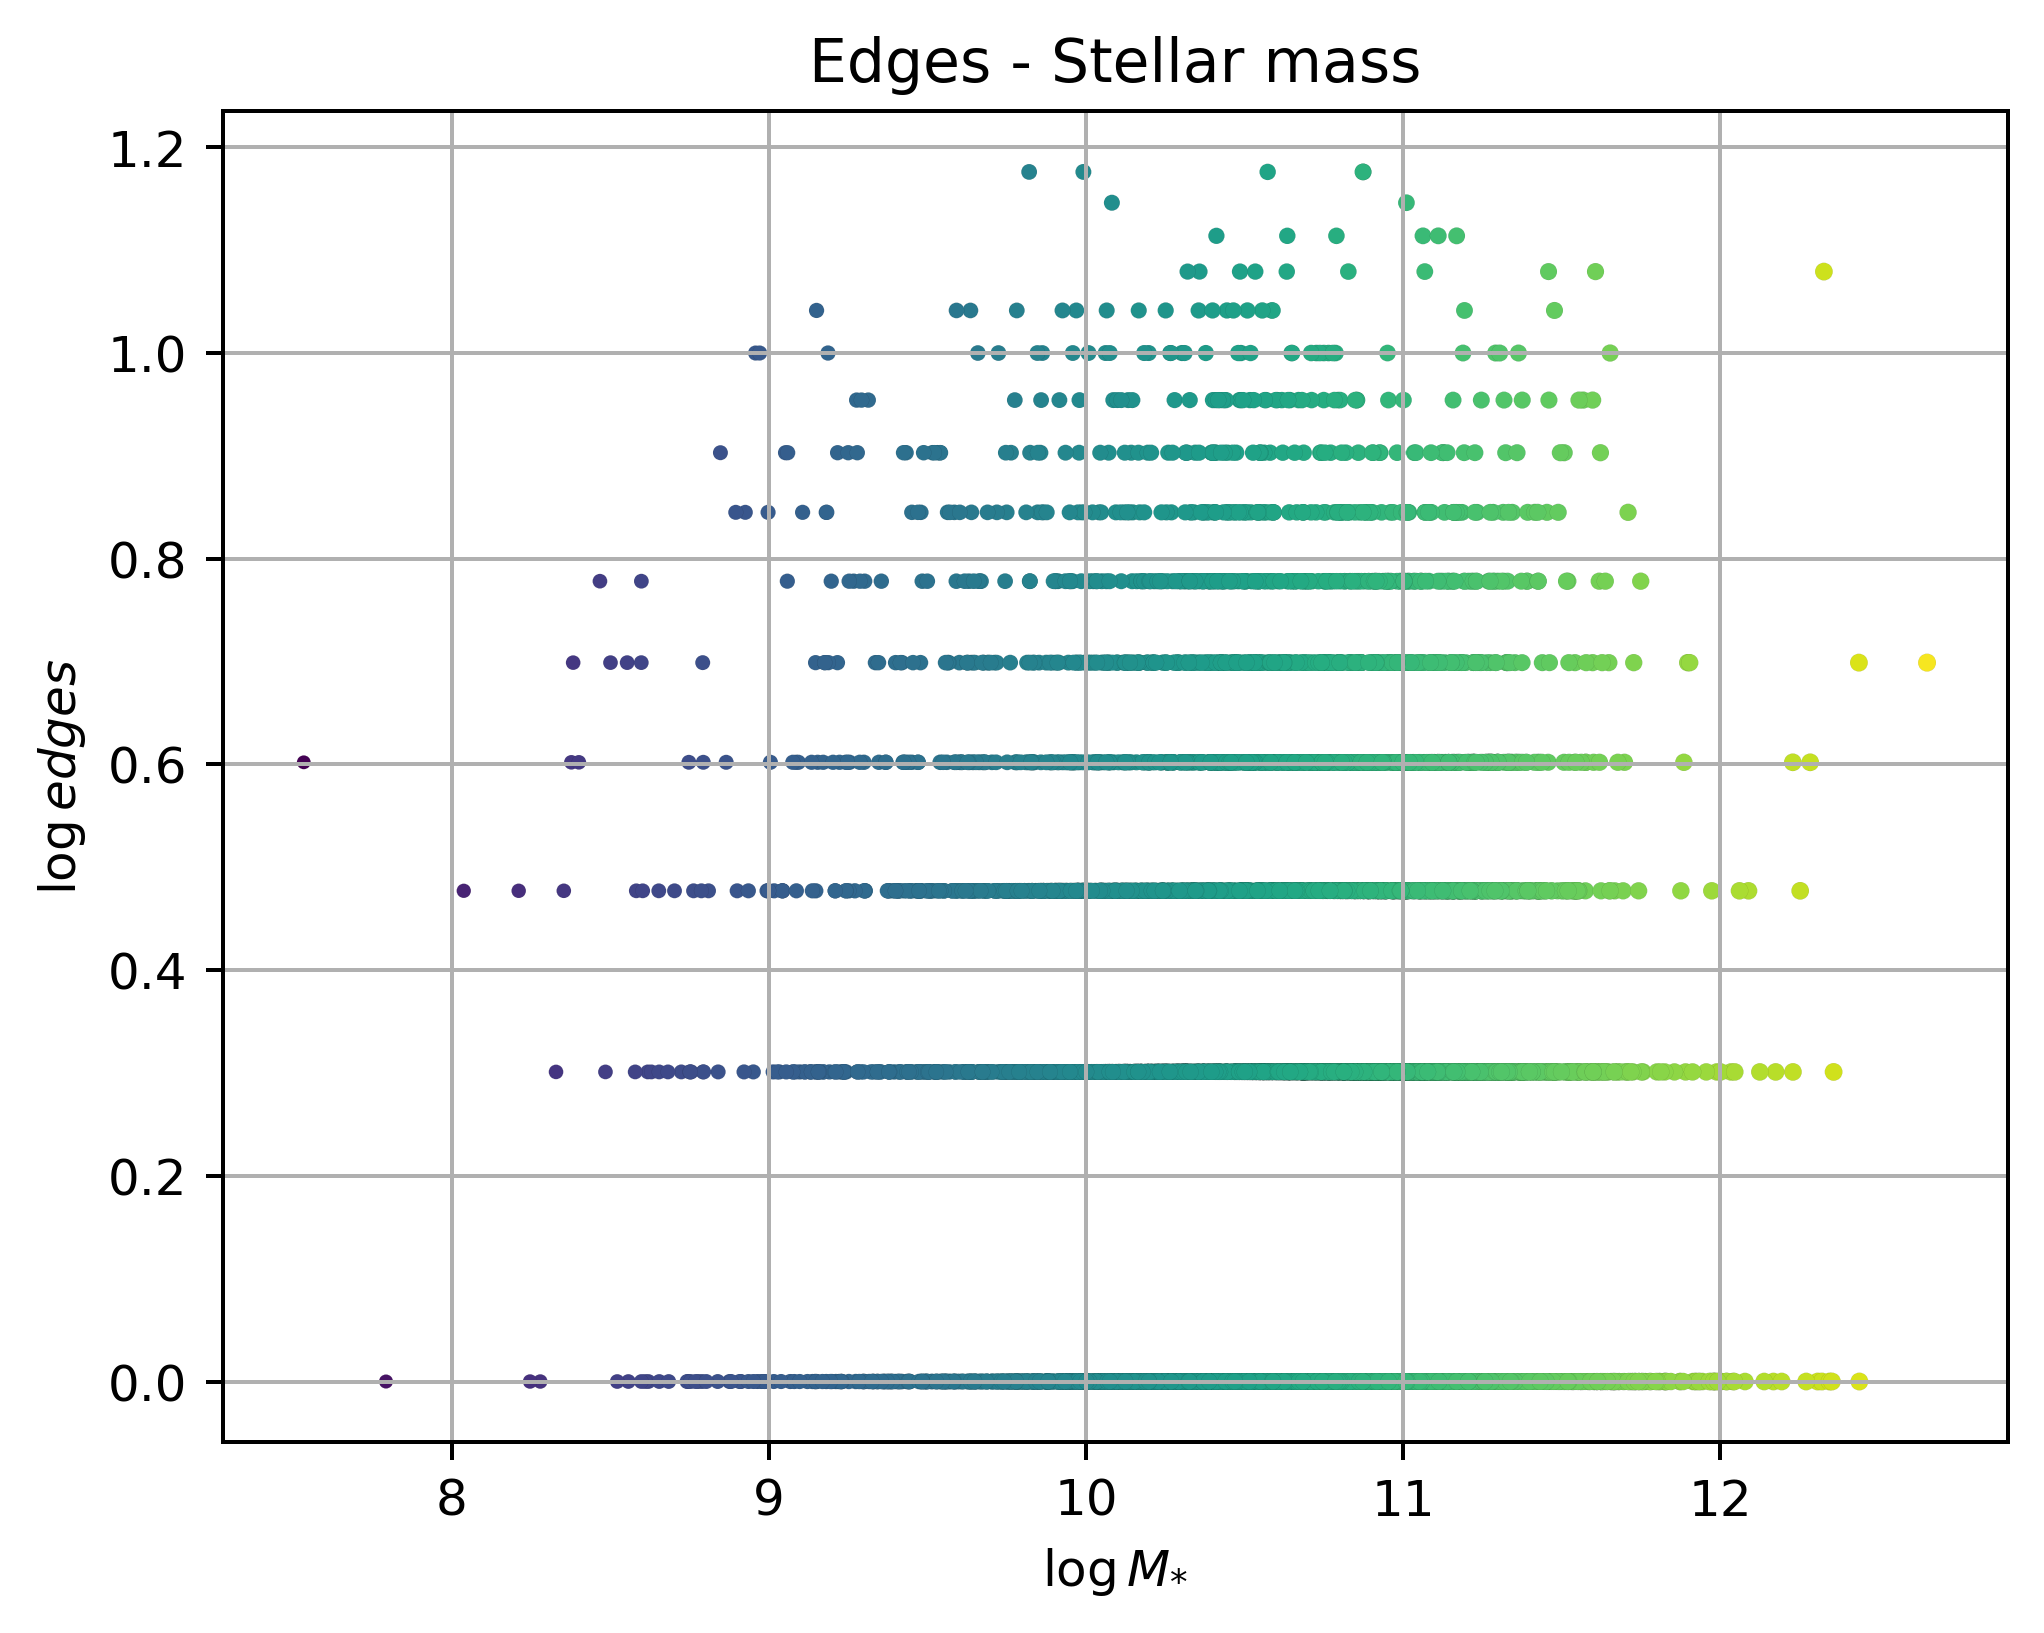

In [5]:
nodes, edges, distances = graph_r(rosettes[0])
c = defaultdict(int)
for edge in edges:
    c[edge[0]] += 1
    c[edge[1]] += 1
m = [n[1] for n in nodes]
ed = [c[n[0]] for n in nodes]

fig = plt.figure()
ax = fig.add_subplot(111)

cmap = cm.viridis
n = (m - np.min(m)) / (np.max(m) - np.min(m))
min_norm = np.min(m)
max_norm = np.max(m)
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
sm.set_array([])

log_ed = np.log10(ed)
ax.scatter(m, log_ed, c=cmap(n), s=m, edgecolors='black', linewidths=0.01)
ax.set_xlabel(r'$\log M_{*}$')
ax.set_ylabel(r'$\log edges$')
plt.grid()
plt.title('Edges - Stellar mass')
plt.show()

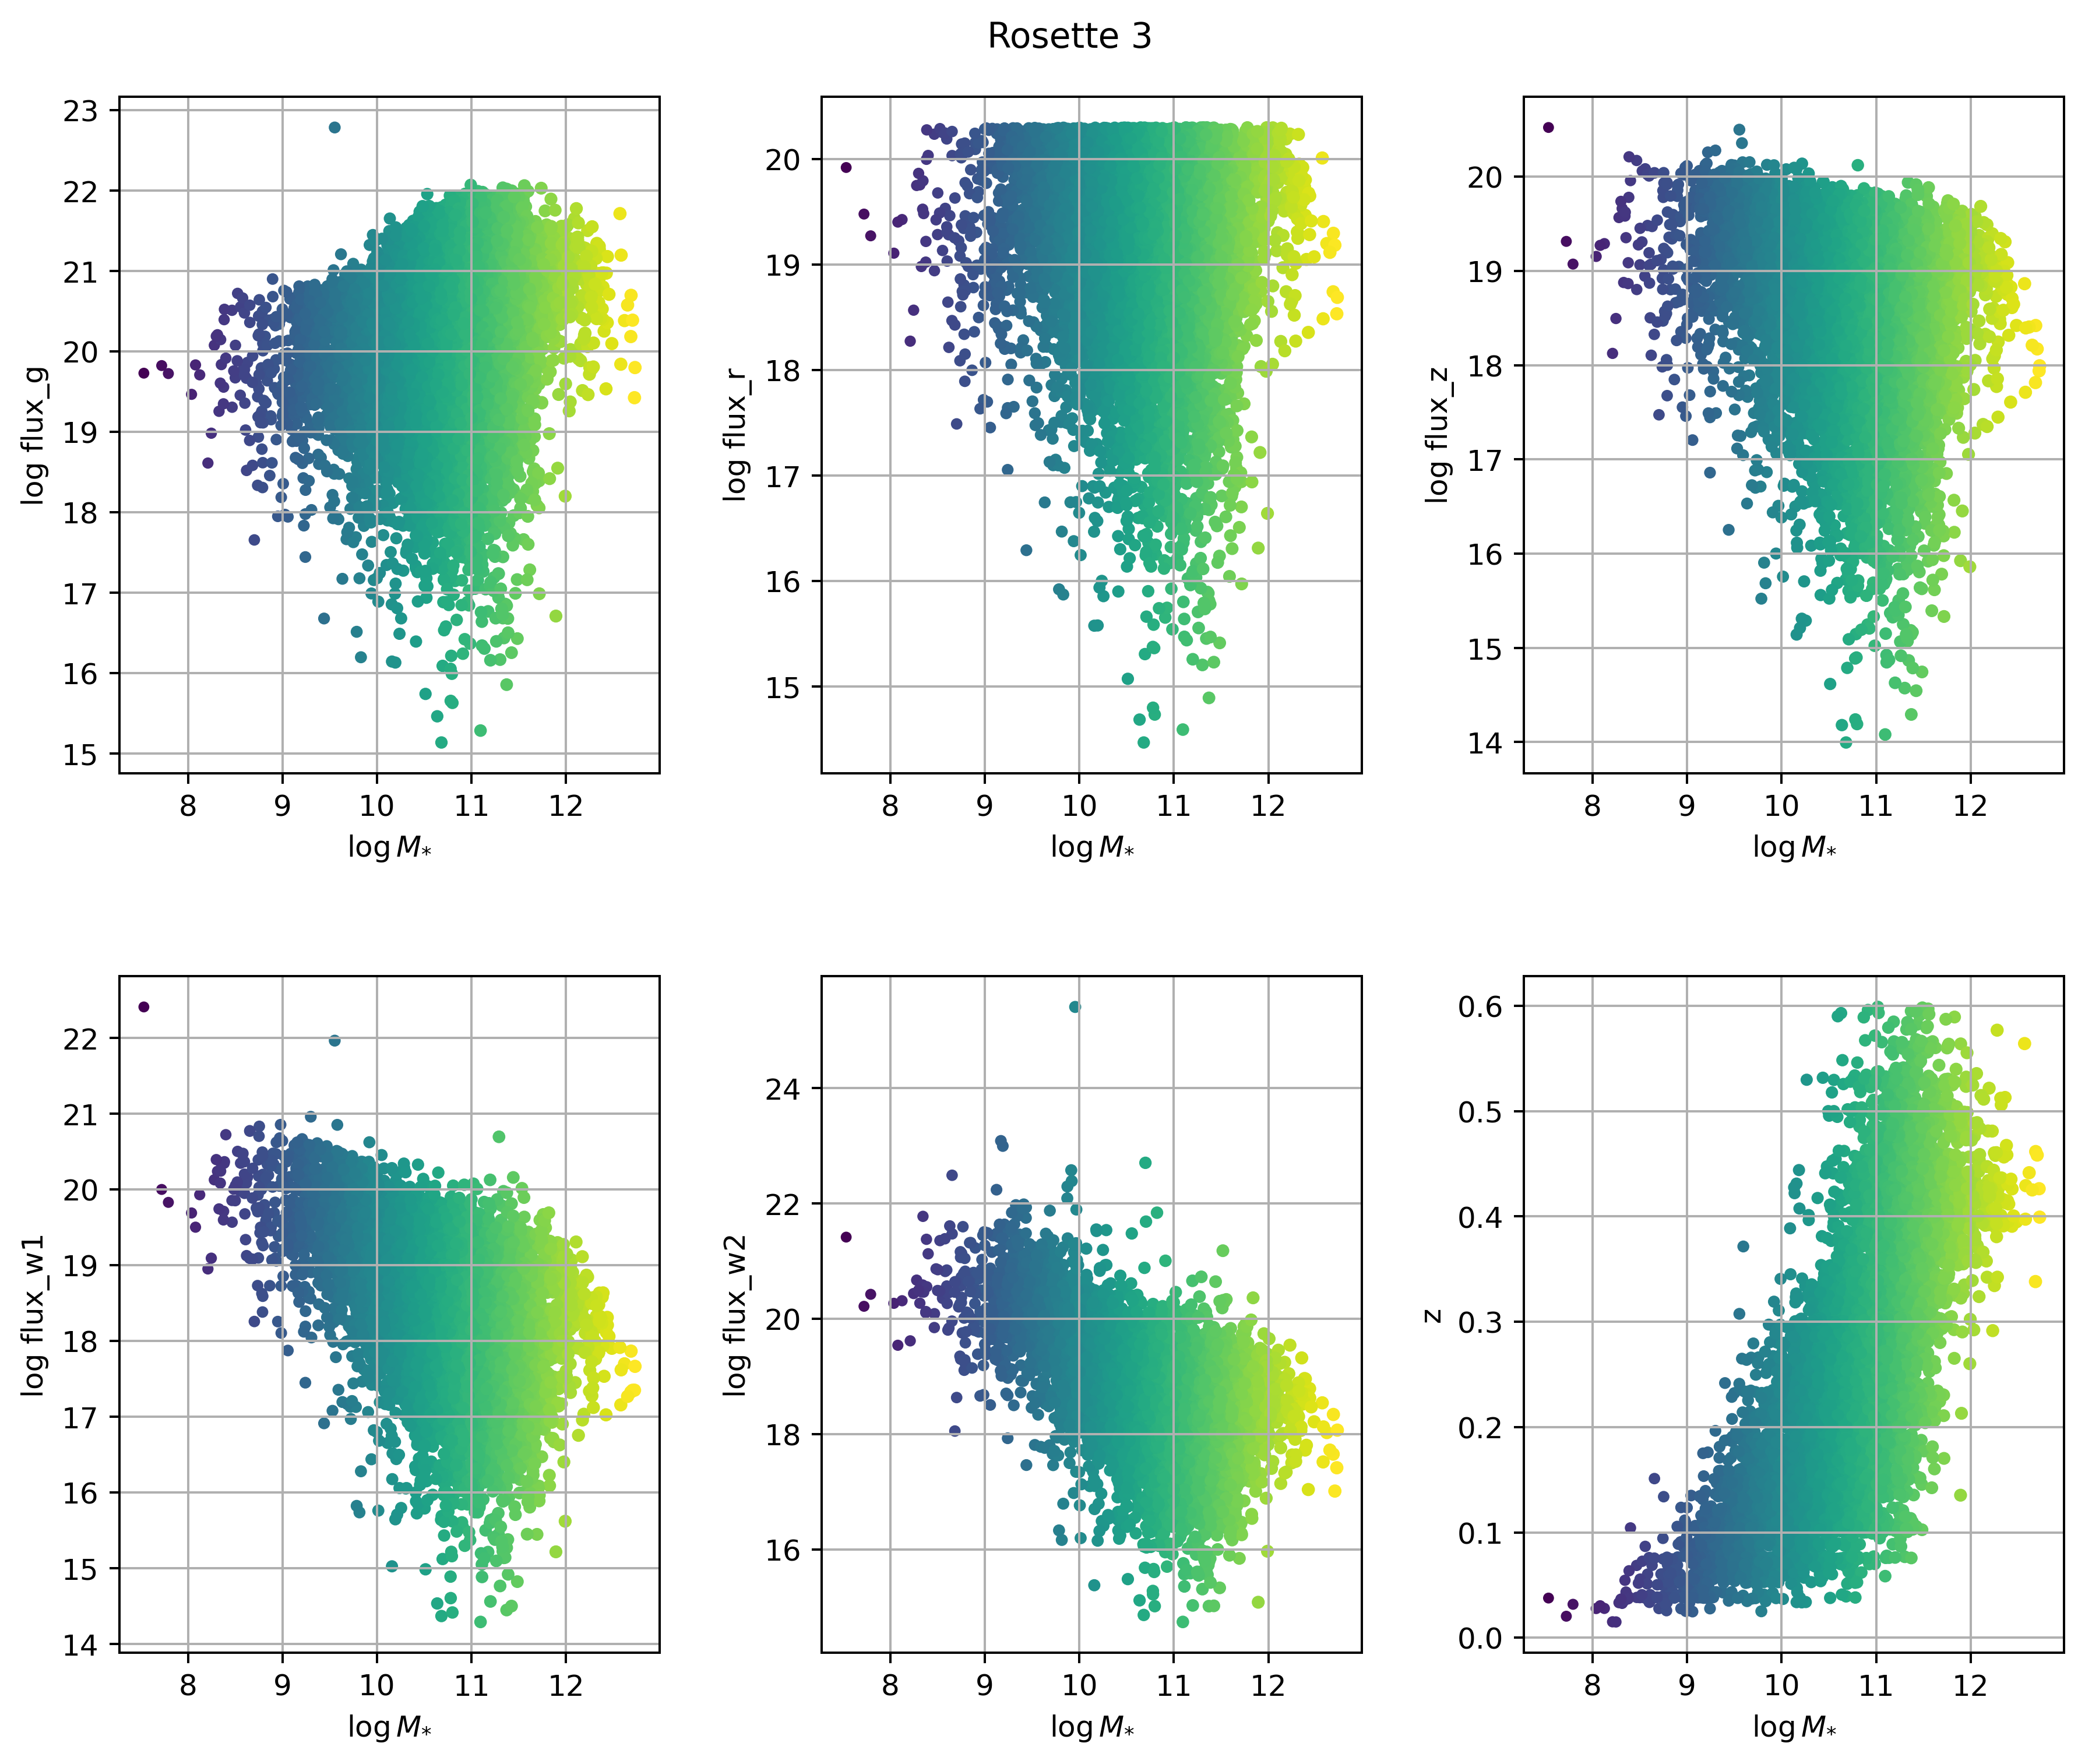

In [6]:
props = ['log flux_g', 'log flux_r', 'log flux_z', 'log flux_w1', 'log flux_w2', 'z']

m = [n[1] for n in nodes]
flux = np.array([n[2:] for n in nodes])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'Rosette 3', y=1.02)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(2):
    for j in range(3):
        axes[i, j].scatter(m, flux[:,i*3+j], c=cmap(n), s=m)
        axes[i, j].set_xlabel(r'$\log M_{*}$')
        axes[i, j].set_ylabel(f'{props[i*3+j]}')
        axes[i, j].grid()

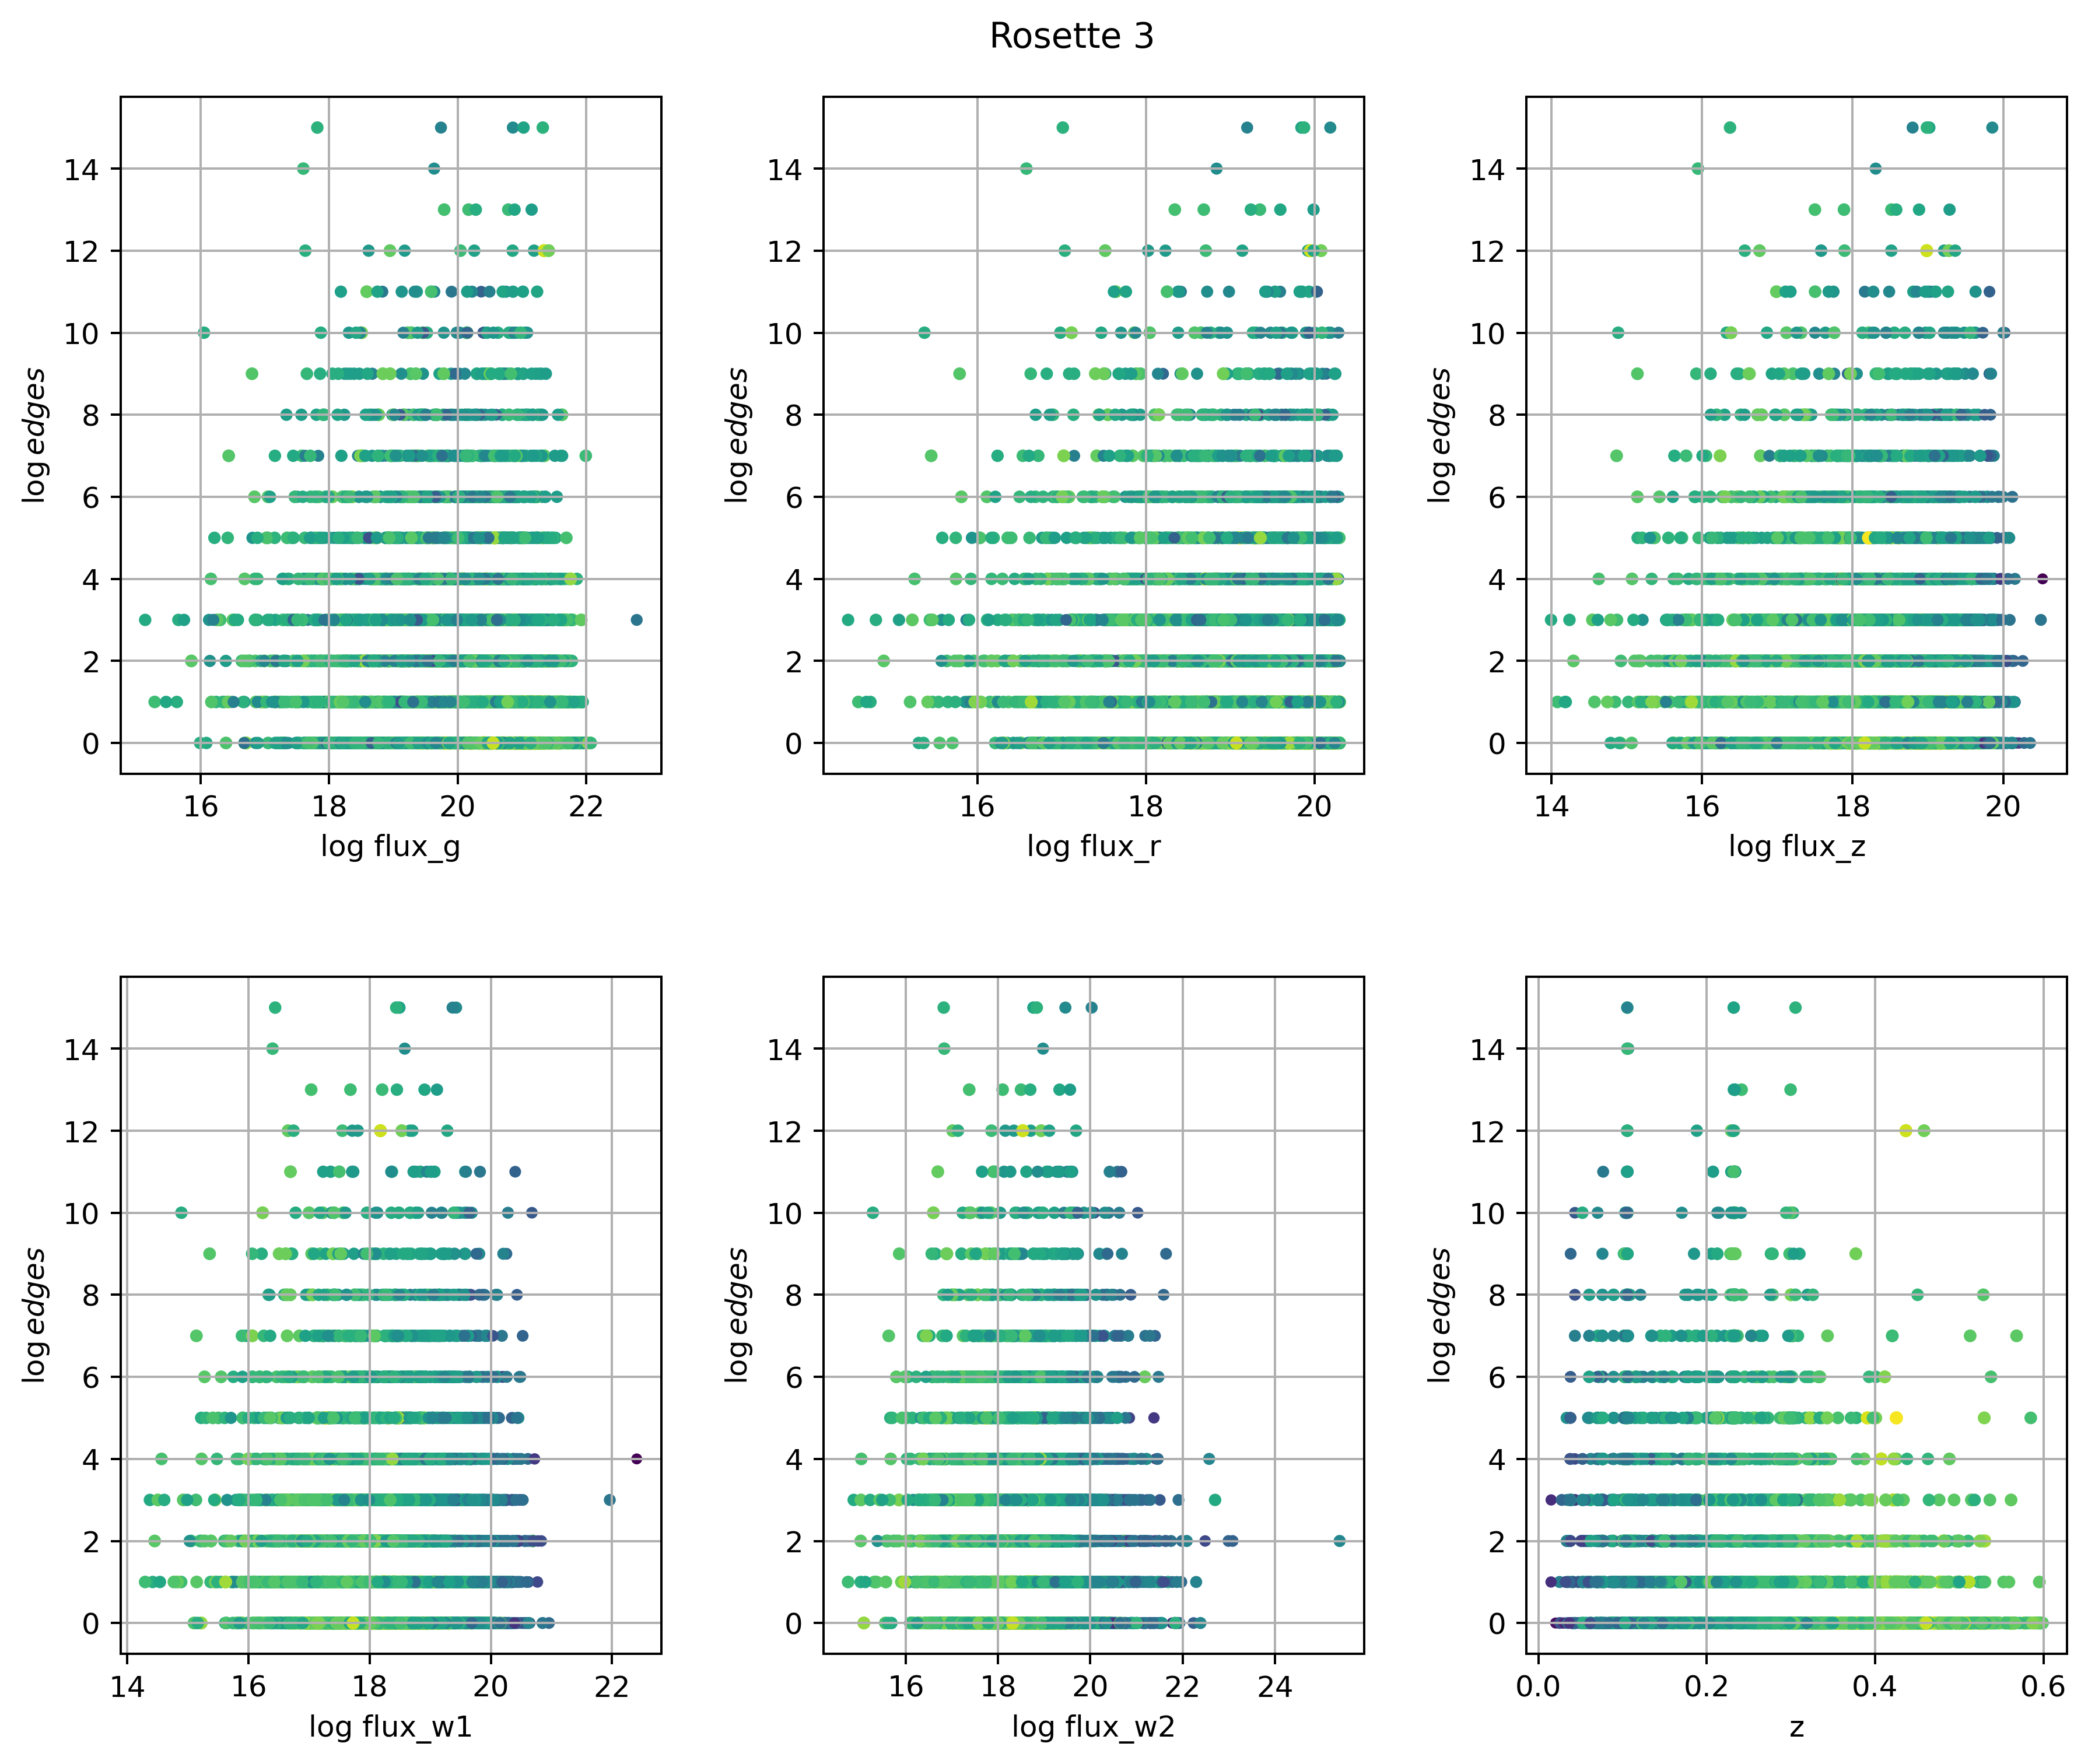

In [7]:
c = defaultdict(int)
for edge in edges:
    c[edge[0]] += 1
    c[edge[1]] += 1
ed = [c[n[0]] for n in nodes]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
plt.tight_layout()
plt.suptitle(r'Rosette 3', y=1.02)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(2):
    for j in range(3):
        axes[i, j].scatter(flux[:,i*3+j], ed, c=cmap(n), s=m)
        axes[i, j].set_ylabel(r'$\log edges$')
        axes[i, j].set_xlabel(f'{props[i*3+j]}')
        axes[i, j].grid()

### Graph images

In [8]:
def graph_r(r):

    nodes = []
    edges = []
    mass = []

    with open(f'./data/rosette{r}_nodes.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                n = []
                n.append(float(values[0]))
                n.extend(22.5-2.5*np.log10([float(n) for n in values[2:-1]]))
                n.append(float(values[-1]))
                nodes.append(n)
                mass.append(float(values[1]))

    with open(f'./data/rosette{r}_edges.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                edges.append([float(n) for n in list(row.values())])

    return (nodes,edges,mass)

In [9]:
def coordinates(r):
    coord = []
    with open(f'./coord/rosette{r}.csv', mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            if (row!=0):
                values = list(row.values())
                coord.append([float(n) for n in values])

    return coord

In [10]:
def plot_graph(r):

    coord = np.array(coordinates(rosettes[0]))
    nodes, edges, mass = graph_r(rosettes[0])
    nodes, edges = np.array(nodes), np.array(edges)

    plt.rcParams['font.size'] = 9
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    cmap = cm.viridis
    c_values = np.array(mass)
    norm = (c_values - np.min(c_values)) / (np.max(c_values) - np.min(c_values))
    min_norm = np.min(c_values)
    max_norm = np.max(c_values)
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
    sm.set_array([])

    ax.scatter(coord[:, 1], coord[:, 2], coord[:, 3], c=cmap(norm), s=norm)

    for edge in edges:
        indices = np.where(coord[:, 0] == edge[0])[0]
        x1, y1, z1 = coord[indices[0], 1:4]

        indices = np.where(coord[:, 0] == edge[1])[0]
        x2, y2, z2 = coord[indices[0], 1:4]

        ax.plot([x1, x2], [y1, y2], [z1, z2], color='black', linewidth=0.1)

    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('DEC (deg)')
    ax.set_zlabel('d (Mpc)')
    plt.title(f'Rosette {r}\nr < 10 Mpc')

    ax.xaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.zaxis._axinfo["grid"]['linewidth'] = 0.5

    cbar = plt.colorbar(sm, ax=ax, pad=0.14)
    cbar.set_label(r'$\log M_{*}$')

    plt.tight_layout()
    plt.show()

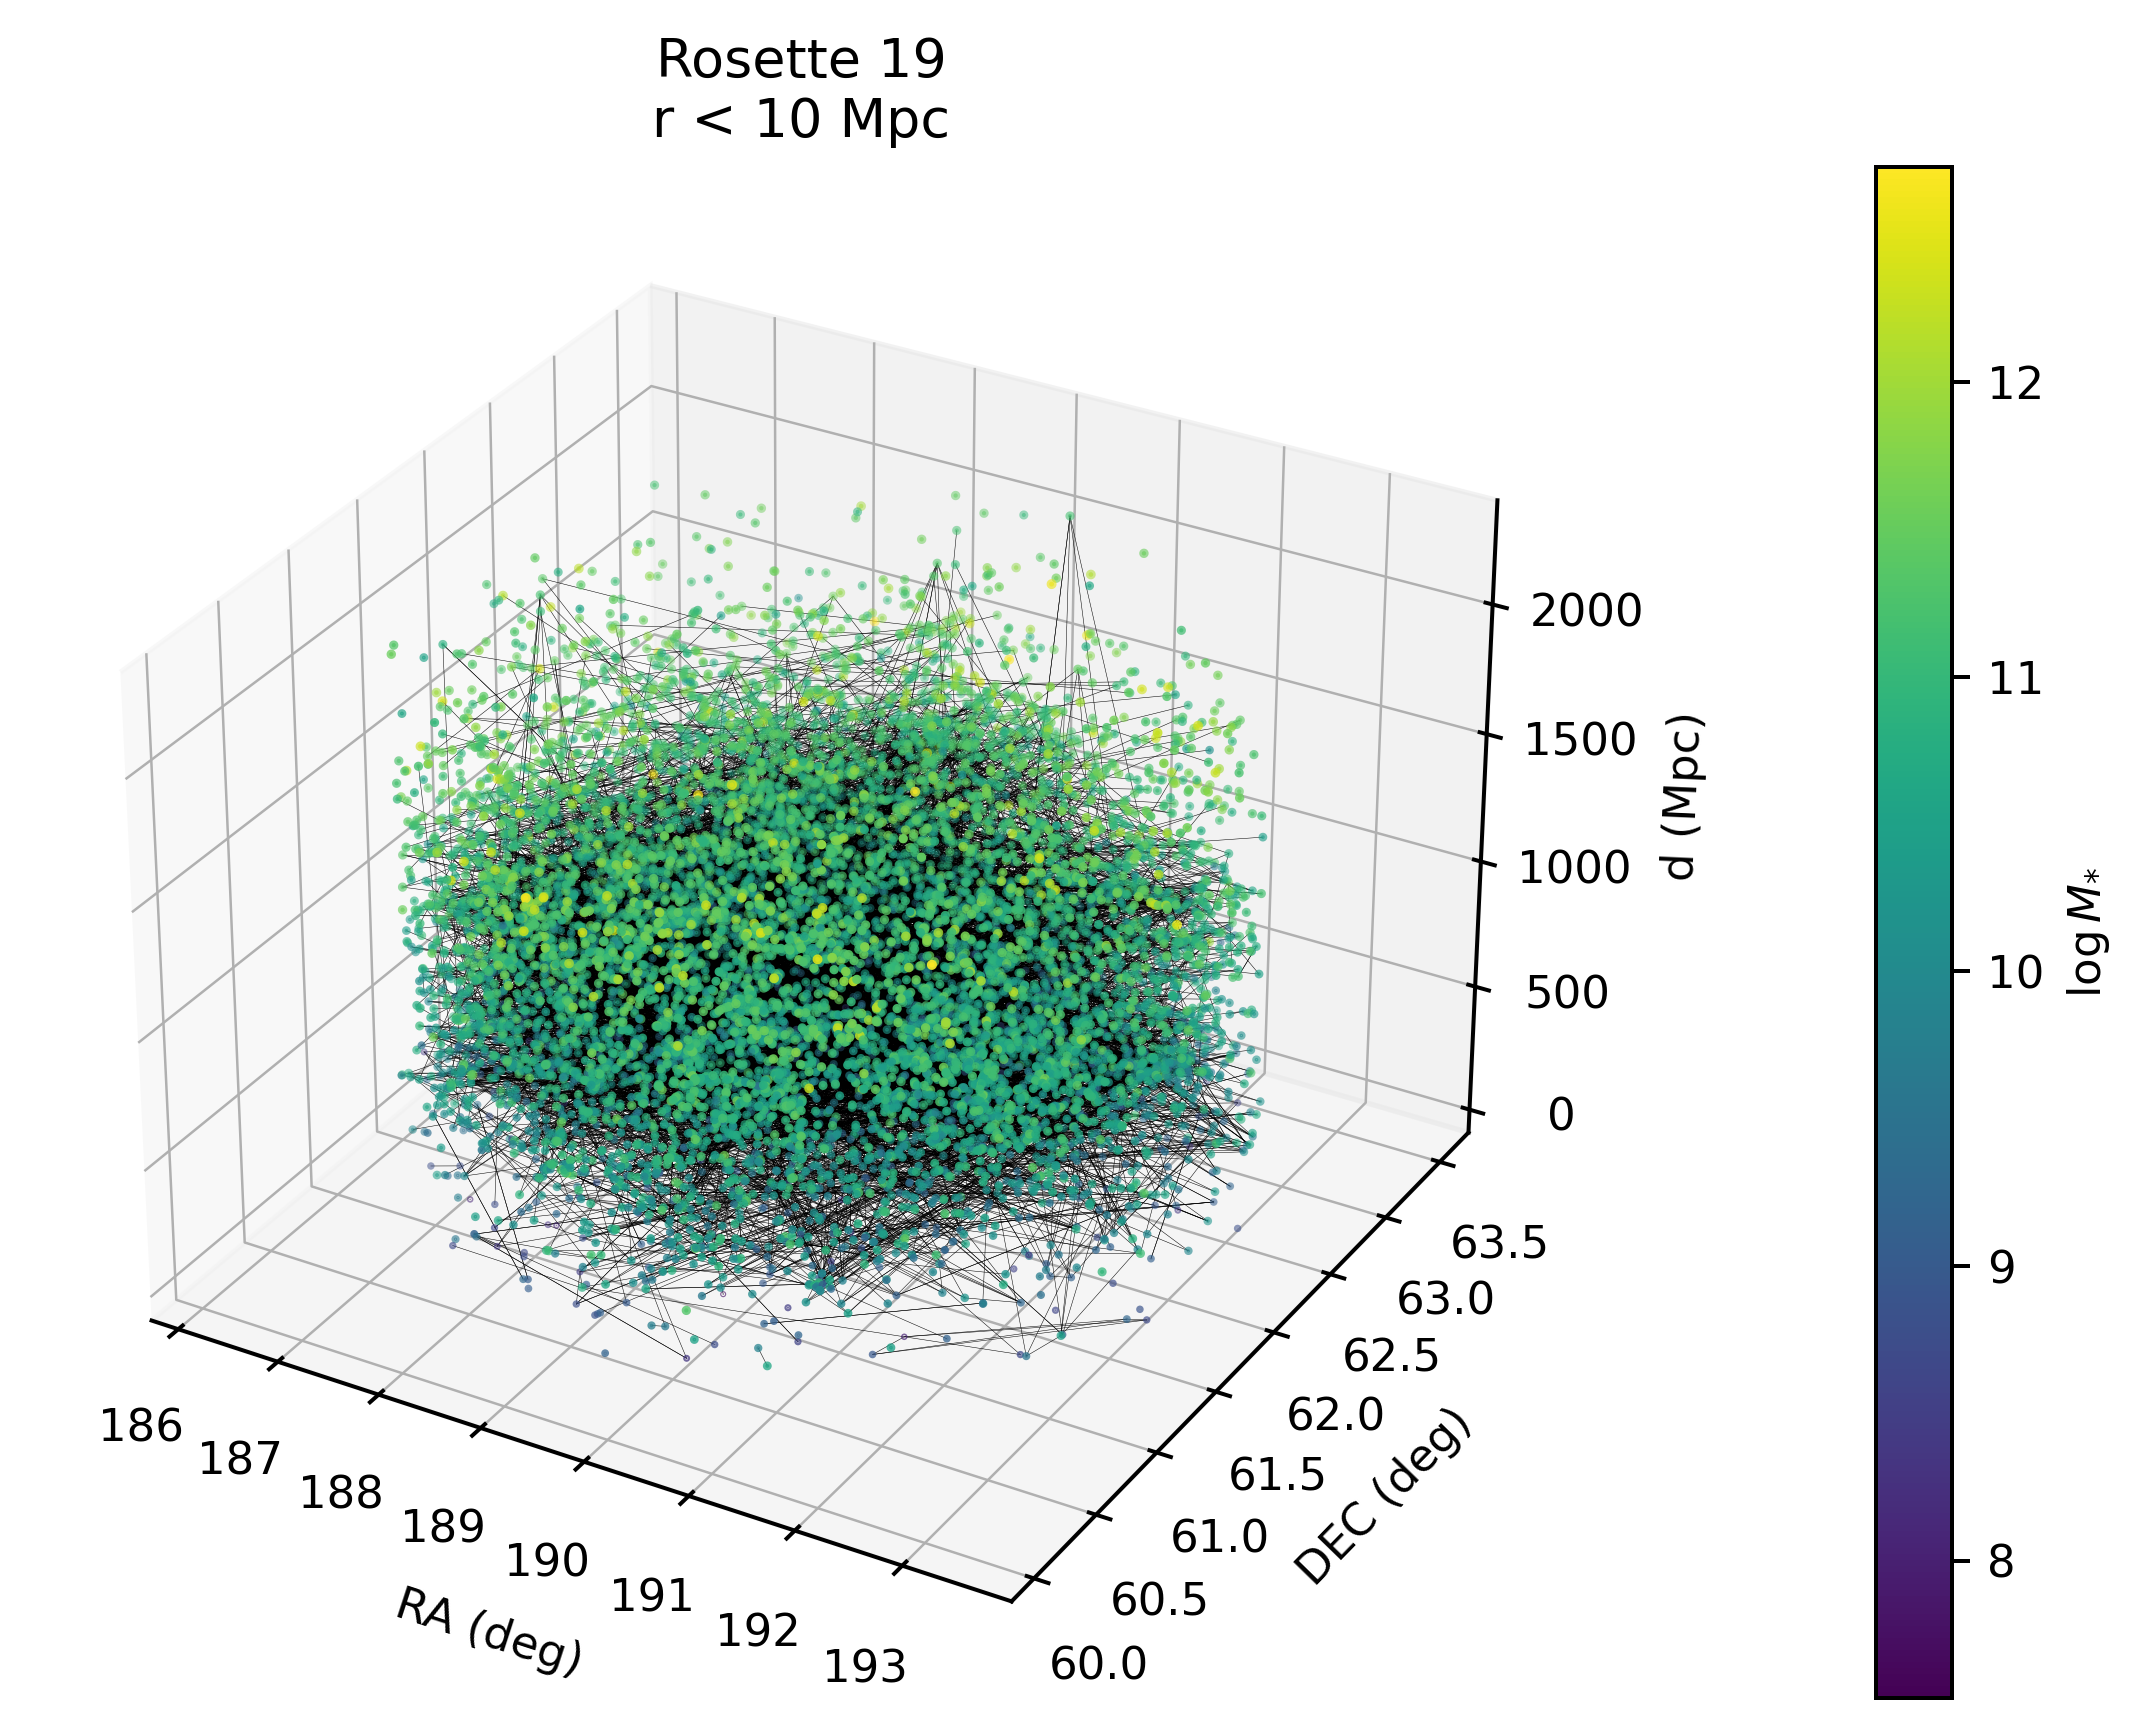

In [11]:
plot_graph(rosettes[-1])

In [12]:
def plot_graph_piece(r, points):

    coord = np.array(coordinates(rosettes[0]))[:points]
    nodes, edges, mass = graph_r(rosettes[0])
    nodes, edges = np.array(nodes), np.array(edges)

    plt.rcParams['font.size'] = 9
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    cmap = cm.viridis
    c_values = np.array(mass)
    norm = (c_values - np.min(c_values)) / (np.max(c_values) - np.min(c_values))
    min_norm = np.min(c_values)
    max_norm = np.max(c_values)
    sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_norm, vmax=max_norm))
    sm.set_array([])

    ax.scatter(coord[:, 1], coord[:, 2], coord[:, 3], c=cmap(norm), s=norm)

    for edge in edges:
        indices = np.where(coord[:, 0] == edge[0])[0]
        x1, y1, z1 = coord[indices[0], 1:4]

        indices = np.where(coord[:, 0] == edge[1])[0]
        x2, y2, z2 = coord[indices[0], 1:4]

        ax.plot([x1, x2], [y1, y2], [z1, z2], color='black', linewidth=0.1)

    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('DEC (deg)')
    ax.set_zlabel('d (Mpc)')
    plt.title(f'Rosette {r}, {points} points\nr < 10 Mpc')

    ax.xaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.5
    ax.zaxis._axinfo["grid"]['linewidth'] = 0.5

    cbar = plt.colorbar(sm, ax=ax, pad=0.14)
    cbar.set_label(r'$\log M_{*}$')

    plt.tight_layout()
    plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

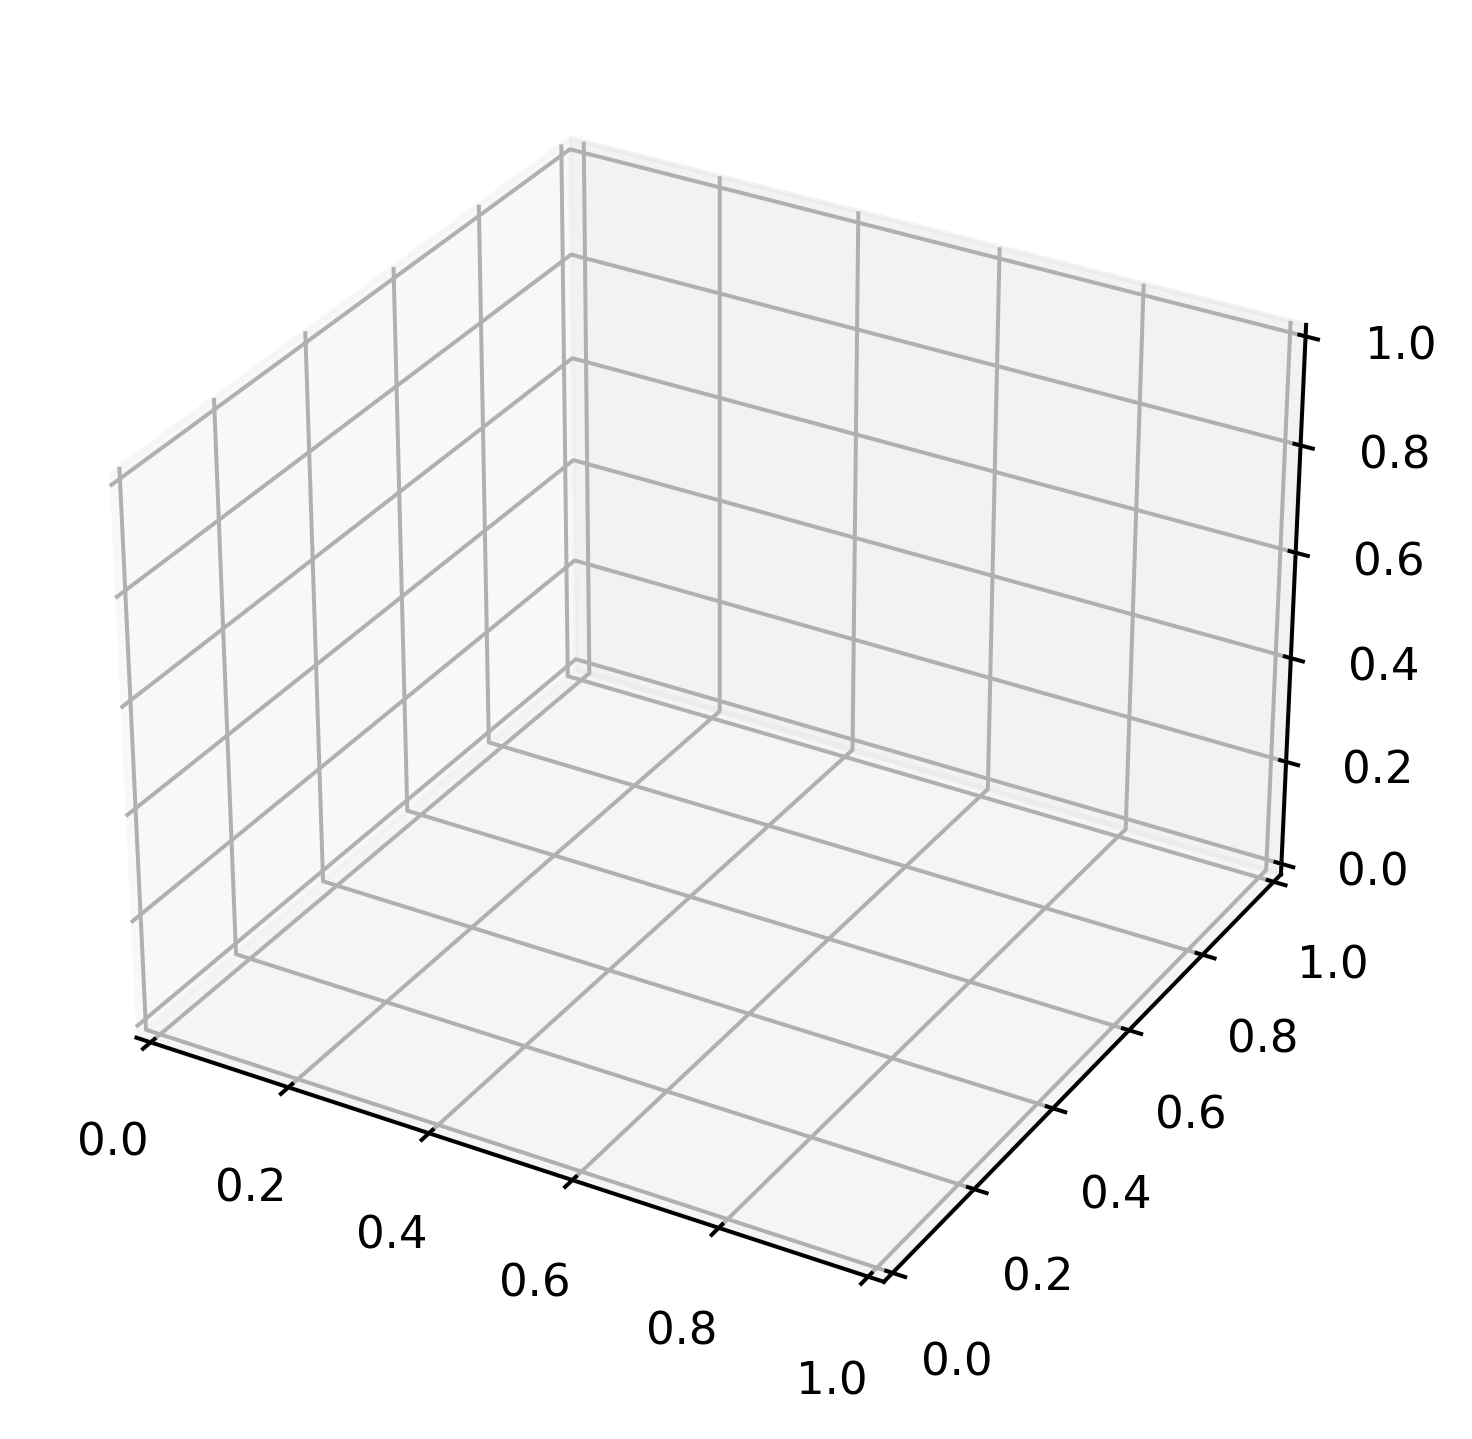

In [13]:
plot_graph_piece(rosettes[-1], 10000)

In [ ]:
def animate()